# Халиков Сардор БФБО-03-24
# ДЗ_2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Стиль графиков
plt.style.use('seaborn-v0_8')

In [21]:
df = pd.read_csv("S02-hw-dataset.csv")

print("Первые 5 строк:")
display(df.head())

print("\nИнформация о столбцах и пропусках:")
df.info()

print("\nОписательные статистики (только числовые столбцы):")
display(df.describe())

print("\nУникальные страны в датасете:")
print(df['country'].unique())

Первые 5 строк:


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296



Информация о столбцах и пропусках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

Описательные статистики (только числовые столбцы):


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000



Уникальные страны в датасете:
['FR' 'RU' 'DE' 'CN' 'US']


In [24]:
print("Доля пропусков:")
print(df.isna().mean())

duplicates = df.duplicated()
print(f"\nКоличество дубликатов: {duplicates.sum()}")

if duplicates.sum() > 0:
    display(df[duplicates])

print("\nПроверка на аномалии")

# Возраст <10 или >100
bad_age = df[(df['age'] < 10) | (df['age'] > 100)]
if not bad_age.empty:
    print("Аномальный возраст:")
    display(bad_age)

neg = df[df['purchases'] < 0]
if not neg.empty:
    print("Отрицательные покупки:")
    display(neg)

# Purchases > 0 и revenue = 0
zero_rev = df[(df['purchases'] > 0) & (df['revenue'] == 0)]
if not zero_rev.empty:
    print("Есть покупки, но нет выручки:")
    display(zero_rev)



Доля пропусков:
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Количество дубликатов: 1


,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511



Проверка на аномалии
Аномальный возраст:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


Отрицательные покупки:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Есть покупки, но нет выручки:


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [13]:
# Частоты по странам
print("Распределение пользователей по странам:")
display(df['country'].value_counts())

# Группировка по стране
print("\nАгрегированные показатели по странам:")
grouped = df.groupby('country').agg(
    пользователей=('user_id', 'count'),
    средний_возраст=('age', 'mean'),
    всего_покупок=('purchases', 'sum'),
    средняя_выручка=('revenue', 'mean'),
    общая_выручка=('revenue', 'sum')
).round(2)
display(grouped)

# Возрастные группы (игнорируем NaN)
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 150], labels=['<30', '30-50', '>50'])
print("\nСредняя выручка по возрастным группам:")
display(df.groupby('age_group', dropna=True)['revenue'].mean().round(2))



Распределение пользователей по странам:


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


Агрегированные показатели по странам:


,пользователей,средний_возраст,всего_покупок,средняя_выручка,общая_выручка
country,,,,,
CN,2,24.00,9,1054.00,2108
DE,6,34.60,39,1445.50,8673
FR,12,46.25,51,675.92,8111
RU,13,30.08,62,790.08,10271
US,8,36.71,37,557.38,4459



Средняя выручка по возрастным группам:


/var/folders/8g/bngk5k1d38dd19t8f7pq_jjw0000gn/T/ipykernel_10612/3457996034.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('age_group', dropna=True)['revenue'].mean().round(2))


age_group
<30       662.93
30-50    1022.76
>50       623.57
Name: revenue, dtype: float64


**Вывод по качеству данных:**
- Пропуски только в `age` (2 строки: user_id=5 и 13).
- Один полный дубликат (user_id=10 повторяется дважды).
- Аномалии:
  - Возраст = 5 и 120 — нереалистичны.
  - Покупки = -1 — явная ошибка.
- Есть пользователи с покупками > 0, но revenue = 0 — требует уточнения.


In [14]:
print("Распределение пользователей по странам:")
display(df['country'].value_counts())

# Группировка
grouped = df.groupby('country').agg(
    users=('user_id', 'count'),
    avg_age=('age', 'mean'),
    total_purchases=('purchases', 'sum'),
    avg_revenue=('revenue', 'mean'),
    total_revenue=('revenue', 'sum')
).round(2)

print("\nАгрегация по странам:")
display(grouped)

# Возрастные группы
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 150], labels=['<30', '30-50', '>50'])

print("\nСредняя выручка по возрастным группам:")
display(df.groupby('age_group')['revenue'].mean().round(2))

Распределение пользователей по странам:


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


Агрегация по странам:


,users,avg_age,total_purchases,avg_revenue,total_revenue
country,,,,,
CN,2,24.00,9,1054.00,2108
DE,6,34.60,39,1445.50,8673
FR,12,46.25,51,675.92,8111
RU,13,30.08,62,790.08,10271
US,8,36.71,37,557.38,4459



Средняя выручка по возрастным группам:


/var/folders/8g/bngk5k1d38dd19t8f7pq_jjw0000gn/T/ipykernel_10612/700048479.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('age_group')['revenue'].mean().round(2))


age_group
<30       662.93
30-50    1022.76
>50       623.57
Name: revenue, dtype: float64

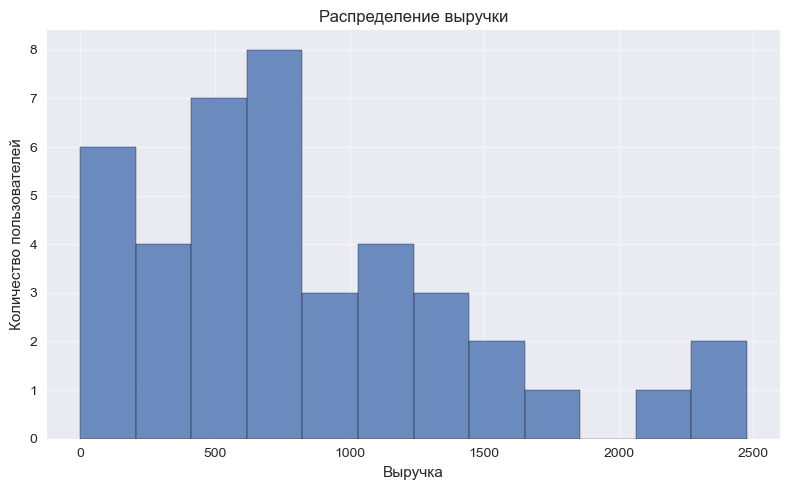

In [15]:
plt.figure(figsize=(8,5))
plt.hist(df['revenue'], bins=12, edgecolor='black', alpha=0.8)
plt.title("Распределение выручки")
plt.xlabel("Выручка")
plt.ylabel("Количество пользователей")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('figures/histogram_revenue.png')
plt.show()

<Figure size 800x500 with 0 Axes>

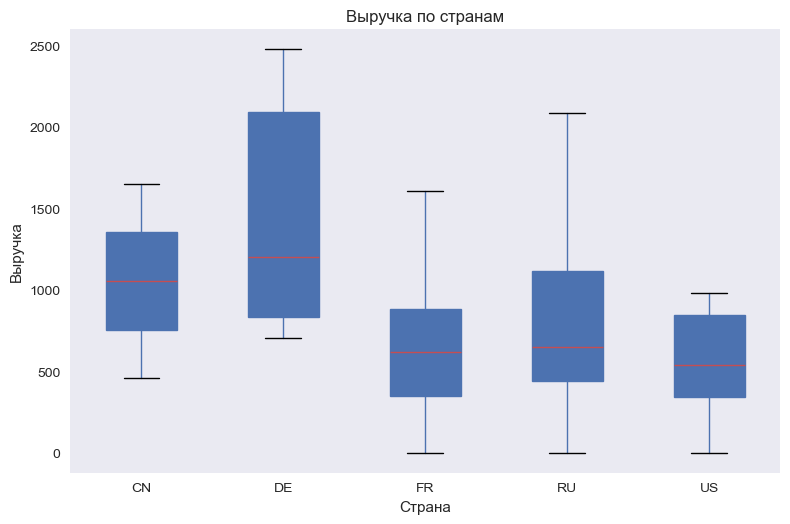

In [9]:
plt.figure(figsize=(8, 5))
df.boxplot(column='revenue', by='country', grid=False, patch_artist=True)
plt.title('Выручка по странам')
plt.suptitle('')  # убираем стандартный заголовок pandas
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.tight_layout()
plt.savefig('figures/boxplot_revenue_by_country.png')
plt.show()

# boxplot показывает медиану и выбросы — удобно


<Figure size 800x500 with 0 Axes>

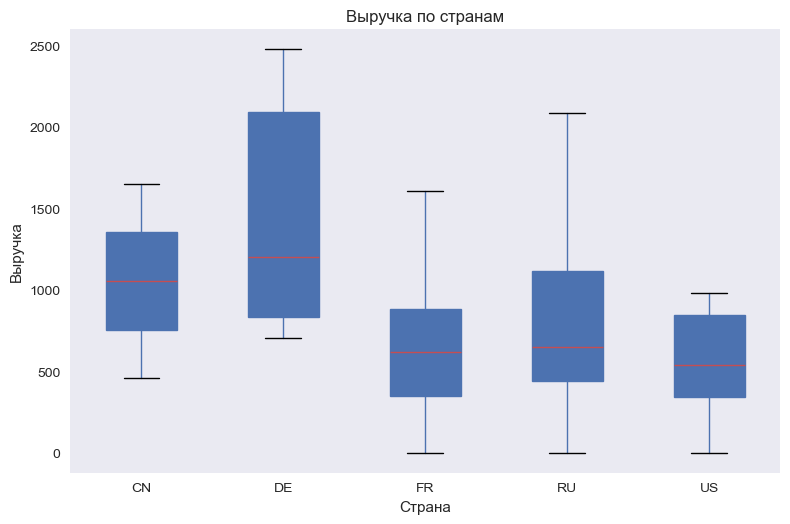

In [16]:
plt.figure(figsize=(8,5))
df.boxplot(column='revenue', by='country', grid=False, patch_artist=True)
plt.suptitle('')
plt.title('Выручка по странам')
plt.xlabel("Страна")
plt.ylabel("Выручка")
plt.tight_layout()
plt.savefig('figures/boxplot_revenue_by_country.png')
plt.show()

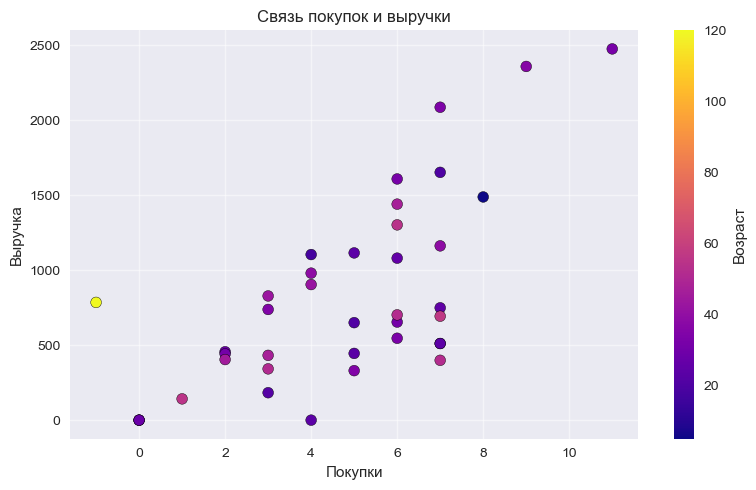

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(df['purchases'], df['revenue'], c=df['age'], cmap='plasma', 
            edgecolor='k', s=60)
plt.colorbar(label="Возраст")
plt.title("Связь покупок и выручки")
plt.xlabel("Покупки")
plt.ylabel("Выручка")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('figures/scatter_purchases_vs_revenue.png')
plt.show()     

# scatter — показывает зависимость двух переменных


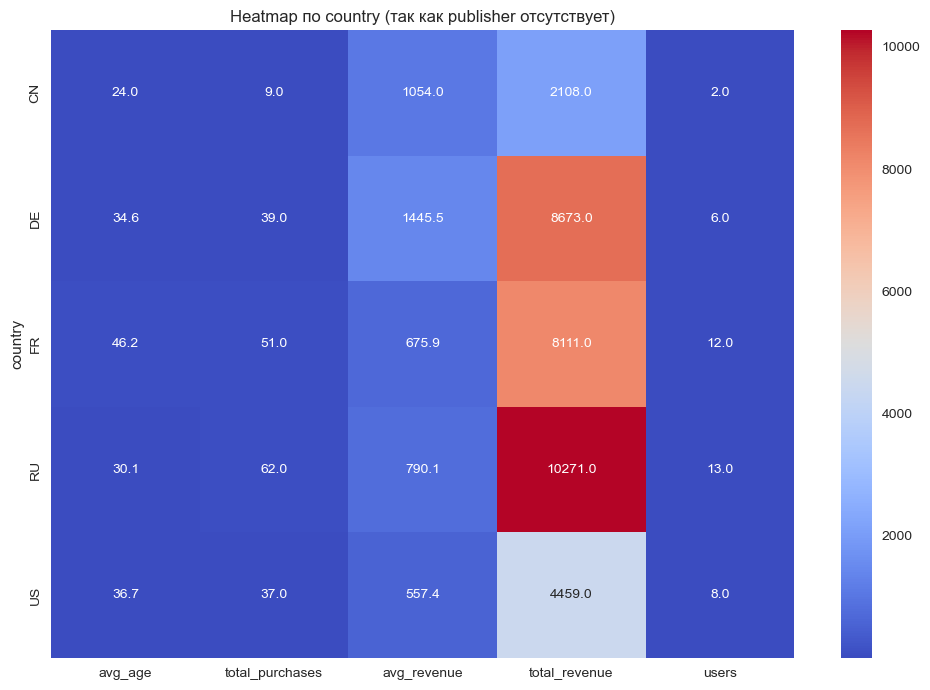

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

country_grouped = df.groupby('country').agg(
    avg_age=('age', 'mean'),
    total_purchases=('purchases', 'sum'),
    avg_revenue=('revenue', 'mean'),
    total_revenue=('revenue', 'sum'),
    users=('user_id', 'count')
).round(2)

sns.heatmap(country_grouped, annot=True, fmt=".1f", cmap='coolwarm')

plt.title("Heatmap по country (так как publisher отсутствует)")
plt.tight_layout()
plt.savefig('figures/heatmap_country.png')
plt.show()